## 1. Building a bag of words model
In this chapter, we will cover vectorization which is, as you may recall, the process of converting text into vectors.
### 1.1. Theory.
#### Recap of data format for ML algorithms
Recall that for any `ML algorithm` to run properly, 
- data fed into it **must be in tabular form** and 
- all the **training features must be numerical**. 

This is clearly not the case for `textual data`. 

In this lesson, we will learn a technique called `bag of words` that **converts** `text documents` into `vectors`.
#### Bag of words model
The `bag of words model` is a procedure of
- **Extracting word tokens** from a text document (henceforth, we will refer to this as just document), 
- **Computing the frequency** of these word tokens and 
- **Constructing a word vector** based on these `frequencies` and the `vocabulary of the entire corpus of documents`. 

This is best explained with the help of an example.

#### Bag of words model example
Consider a corpus of three documents. 

            "The lion is the king of the jungle." 
            "Lions have an average lifespan of 15 years." 
            "The lion is an endangered species."

We now extract the unique word tokens that occur in this corpus of documents. This will be the vocabulary of our model. In this example, the following 15 word tokens will constitute our vocabulary.

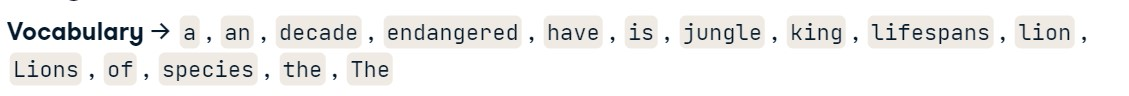

In [1]:
from IPython.display import Image
## Hình minh họa Image(fig1, height, width)

Since there are 15 words in our vocabulary, our word vectors will have 15 dimensions and each dimension's value will correspond to the frequency of the word token corresponding to that dimension. 

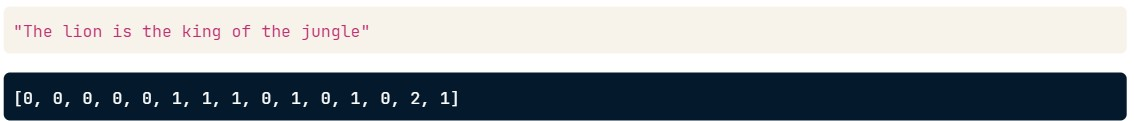

In [2]:
## Hình minh họa Image(fig1, height, width)

For instance, the second dimension will correspond to the number of times the second word in the vocabulary, an, occurs in the document. Let's now convert our documents into word vectors using this bag of words model. The lion is the king of the jungle is converted to the following vector.

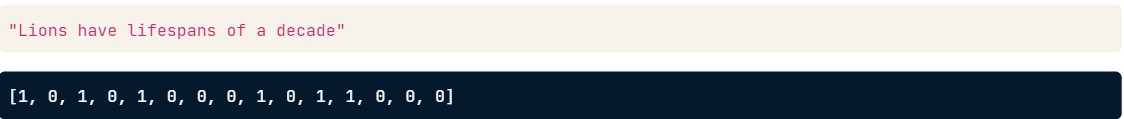

In [3]:
## Hình minh họa Image(fig1, height, width)

Similarly, the other two sentences have the following word vector representations.

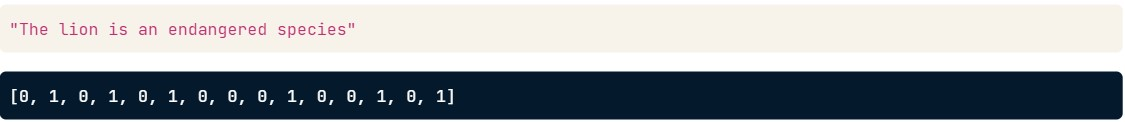

In [4]:
## Hình minh họa Image(fig1, height, width)

#### Text preprocessing
As we were constructing this model, you may have noticed how text preprocessing would have been extremely useful in creating arguably better models. 

- We would usually want `Lions` and `lion` to mean the same thing and therefore, counted as the same thing. 
- The same applies to `'the'` with different cases. 
- We would also want to **remove `punctuations`** and **`stopwords`** as they are extremely common and don't really contribute much to the character of the document.

Performing `text preprocessing` usually **leads to smaller vocabularies**, which is a good thing. 

While working with `vectorization`, it is routine to form word vectors running into thousands of dimensions and keeping this to a minimum helps improve performance.

In [5]:
import pandas as pd

#### Bag of words model using sklearn
To construct the bag of words model in `Python`, we will use the `scikit-learn library`. 

We will use the `corpus` from before, consisting of the three sentences on `lions`. 

In [6]:
lions_sentences = ["The lion is the king of the jungle." ,
                    "Lions have an average lifespan of 15 years.", 
                    "The lion is an endangered species."]
lion_corpus = pd.Series(lions_sentences)
lion_corpus

0            The lion is the king of the jungle.
1    Lions have an average lifespan of 15 years.
2             The lion is an endangered species.
dtype: object

Let's ignore text preprocessing for now.

- We import the CountVectorizer class from `sklearn.feature_extraction.text`. This is the class that will help us build our bag of words model. 

In [7]:
from sklearn.feature_extraction.text import CountVectorizer

- Next, we instantiate a `CountVectorizer object vectorizer`. We finally create our matrix of word vectors by passing `lion_corpus` to the `fit_transform` method of `vectorizer`. This is stored in `bow_matrix`.

In [8]:
vectorizer = CountVectorizer()
bow_matrix = vectorizer.fit_transform(lion_corpus)
bow_matrix

<3x15 sparse matrix of type '<class 'numpy.int64'>'
	with 20 stored elements in Compressed Sparse Row format>

This `bow_matrix` is a `sparse matrix` and we can print out its `2D array` form using `bow matrix.toarray()`. 

This gives us the following output.

In [9]:
bow_matrix.toarray()

array([[0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 3, 0],
       [1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1],
       [0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0]])

Notice how this is different from the word vectors we generated. This is because `CountVectorizer` automatically `lowercases` words and ignores single character tokens such as `'a'`. 

Also, it doesn't necessarily index the vocabulary in `alphabetical order`. We will learn how to map the vocabulary to the indices in the exercises. We can now use this `bow_matrix` as our training features in `ML models`.

### 1.2. PRACTICE
#### Exercise 1.2.1. Word vectors with a given vocabulary
You have been given a corpus of documents and you have computed the vocabulary of the corpus to be the following: 

        a, an, and, but, can, come, evening, forever, go, i, men, may, on, the, women

Which of the following **corresponds** to the `bag of words vector` for the document `"men may come and men may go but i go on forever"`?

>- A. `(0, 0, 1, 1, 0, 1, 0, 1, 2, 1, 2, 2, 1, 0, 0)`
>- B. `(0, 1, 0, 1, 1, 1, 2, 0, 2, 1, 0, 0, 0, 2, 0)`
>- C. `(2, 1, 0, 0, 2, 1, 0, 0, 0, 1)`
>- D. `(0, 0, 1, 2, 1, 2, 1, 1, 1, 0, 0, 1, 1, 1, 1)`

#### Answers.
>- A. **Correct!!** Each value in the vector corresponds to the frequency of the corresponding word in the vocabulary. [For instance, the words `a, an` didn't appear in the `document` hence the `bow_vector` at the 2 first indexes must be `0`]
>- B, D. Incorrect! This wouldn't be the correct representation under the bag of words model.
>- C. Wrong! The vocabulary has 15 word tokens!

#### Exercise 1.2.2. BoW model for movie taglines
In this exercise, you have been provided with a corpus of more than 7000 movie tag lines. Your job is to generate the bag of words representation bow_matrix for these `taglines`. 

In [10]:
corpus = pd.read_csv(r"../input/nlp-fe-datasets/movie_overviews.csv", usecols = ['tagline'])
corpus = corpus.dropna()
corpus = pd.Series(corpus.to_numpy().ravel(), name = 'tagline')
corpus.head(3)

0            Roll the dice and unleash the excitement!
1    Still Yelling. Still Fighting. Still Ready for...
2    Friends are the people who let you be yourself...
Name: tagline, dtype: object

For this exercise, we will ignore the text preprocessing step and generate bow_matrix directly.

We will also investigate the shape of the resultant bow_matrix. The first five taglines in corpus have been printed to the console for you to examine.
#### SOLUTION.

In [11]:
# Import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Create CountVectorizer object
vectorizer = CountVectorizer()

# Generate matrix of word vectors
bow_matrix = vectorizer.fit_transform(corpus)

# Print the shape of bow_matrix
print(bow_matrix.shape)

(7033, 6614)


**Comments.** 

Notice that the word vectors created have more than `6600 dimensions`. 

However, most of these dimensions have a value of zero since most words do not occur in a particular `tagline`.

#### Exercise 1.2.3. Analyzing dimensionality and preprocessing
In this exercise, you have been provided with a `lem_corpus` which contains the `pre-processed` versions of the movie taglines from the previous exercise. 

In [12]:
import spacy
nlp = spacy.load("en_core_web_sm")
stop_words = spacy.lang.en.stop_words.STOP_WORDS

**Pre-processing text**

In [13]:
def pre_pro(x):
    """This function returns the text has been lowercased and lemmatized, then removed English-stopwords"""
    # Lowercase
    x = x.lower()
    doc = nlp(x)
    
    # Lemmatized then removed stopwords
    lemmas = [token.lemma_ for token in doc]
    a_lemmas = [lemma for lemma in lemmas 
                if lemma.isalpha() and lemma not in stop_words]
    return ' '.join(a_lemmas)

%time lem_corpus = corpus.apply(pre_pro)
lem_corpus.head(3)

CPU times: user 1min 2s, sys: 104 ms, total: 1min 2s
Wall time: 1min 2s


0    roll dice unleash excitement
1           yell fight ready love
2    friend people let let forget
Name: tagline, dtype: object

In other words, the `taglines` have been `lowercased` and `lemmatized`, and `stopwords have been removed`.

>> Your job is to **generate the bag of words representation `bow_lem_matrix`** for these `lemmatized taglines` and compare its shape with that of `bow_matrix` obtained in the previous exercise. 

#### SOLUTION.

In [14]:
# Create CountVectorizer object
vectorizer = CountVectorizer()

# Generate matrix of word vectors
bow_lem_matrix = vectorizer.fit_transform(lem_corpus)

# Print the shape of bow_lem_matrix
print(bow_lem_matrix.shape)

(7033, 4964)


**Comments.** 

Notice how the number of features have reduced significantly from around `6600` to `4964` for pre-processed movie taglines. 

The reduced number of dimensions on account of text preprocessing usually leads to better performance when conducting machine learning and it is a good idea to consider it. 

However, as mentioned in a previous lesson, the final decision always depends on the nature of the application.

#### Exercise 1.2.4. Mapping feature indices with feature names
In the lesson, we had seen that `CountVectorizer` **doesn't necessarily index the vocabulary in alphabetical order**. 

In this exercise, we will learn to **map** each `feature index` to its corresponding `feature name` from the vocabulary.

We will use the same three sentences on lions from the theory. The `sentences` are available in a list named `lion_corpus` and has already been uploaded.
#### SOLUTION

In [15]:
lions_sentences = ["The lion is the king of the jungle." ,
                    "Lions have an average lifespan of a decade.", 
                    "The lion is an endangered species."]
lion_corpus = pd.Series(lions_sentences)
lion_corpus
## Xoa 3 thang o tren

# Create CountVectorizer object
vectorizer = CountVectorizer()

# Generate matrix of word vectors
bow_matrix = vectorizer.fit_transform(lion_corpus)

# Convert bow_matrix into a DataFrame
bow_df = pd.DataFrame(bow_matrix.toarray())

# Map the column names to vocabulary 
bow_df.columns = vectorizer.get_feature_names()

# Print bow_df
bow_df

,an,average,decade,endangered,have,is,jungle,king,lifespan,lion,lions,of,species,the
0,0,0,0,0,0,1,1,1,0,1,0,1,0,3
1,1,1,1,0,1,0,0,0,1,0,1,1,0,0
2,1,0,0,1,0,1,0,0,0,1,0,0,1,1


#### Comments.
Observe that the column names refer to the token whose frequency is being recorded. 

Therefore, since the first column name is `an`, the first feature represents the number of times the word `'an'` occurs in a particular sentence. `get_feature_names()` essentially gives us a list which represents the mapping of the feature indices to the feature name in the vocabulary.

## 2. Building a BoW Naive Bayes classifier
### 2.1. Theory
In this lesson, we will walk through a machine learning problem that utilizes feature engineering techniques we've learned, to arrive at a desired result.

#### Spam filtering
Let's take a look at the spam filtering problem. We're given a dataset of messages that have been labelled as `spam` or `ham`. 

Here, you can see a typical spam and ham message. Our task is to train an `ML model` that can predict the label given a particular text.

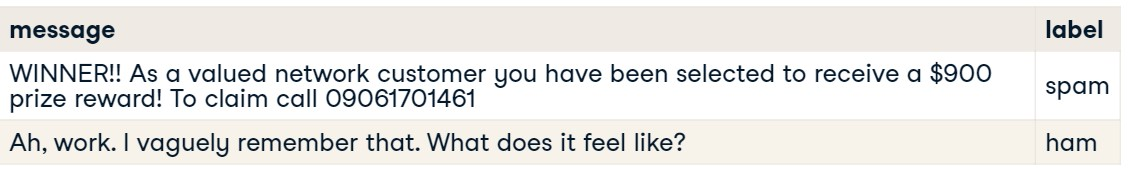

In [16]:
## Hình minh họa Image(fig1, height, width)

#### Steps
There are 3 steps involved. 
- The first is to `preprocess the text`. 
- Next, we proceed to `build the bag-of-words model`. 
- Finally, we conduct `predictive modeling` using the generated BoW vectors.

Note that although we use the term `'modeling'` in the context of both BoW and machine learning, they mean two different things.
#### Text preprocessing using CountVectorizer
We've already learned how to conduct text preprocessing using `spaCy`. 

However, it is also possible to do this using `CountVectorizer`. `CountVectorizer` takes in a number of arguments to perform preprocessing.
- The `lowercase argument`, when set to **True**, converts words to lowercase. 
- The `strip_accents` argument can convert accented characters according to `unicode` or `ASCII mapping`. 
- Passing in a `stopwords argument` will lead to `CountVectorizer` ignoring `stopwords`. You can pass in a custom list or the string `'english'` to use scikit-learn's list of English stopwords.
- You can specify `tokenization` using a regular expression as the value of the `token_pattern argument`. 
- `Tokenization` can also be specified using a `tokenizer argument`. 

Here, you can pass a function that takes a string as an argument and returns a list of tokens. 
- This way, `CountVectorizer` allows usage of `spaCy's tokenization techniques`. 
- `CountVectorizer` cannot perform certain steps such as `lemmatization` automatically. 

This is where `spaCy` is useful. 

Although it performs `tokenization` and `preprocessing`, `CountVectorizer`'s main job is to convert a corpus into a matrix of numerical vectors.

#### Building the BoW model
As usual, we import `CountVectorizer` from scikit-learn. We then instantiate a `CountVectorizer object` called vectorizer.
- We perform accent stripping using `ASCII mapping` and 
- `remove English stopwords`. 
- We also set the `lowercase argument` to **False**. This is because **spam messages** usually tend to **abuse all-capital words** and we might want to preserve this information for the `ML step`. 

In [17]:
vectorizer = CountVectorizer(strip_accents = 'ascii', stop_words = 'english', lowercase = False)

The dataset has been already been loaded into the dataframe `df`. 

In [18]:
df = pd.read_csv(r'../input/nlp-fe-datasets/spam.csv', 
                 usecols = ['text_mes', 'target'], encoding='latin-1')
df.head(3)

,target,text_mes
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...


We split this dataset into training and test sets using `scikit-learn's train test split` function.

In [19]:
from sklearn.model_selection import train_test_split

We now fit the vectorizer on the training set and transform it into its `bag-of-words representation`. 
- We can perform both these steps together using the `fit transform method`.
- Next, we transform the test set into its `BoW representation`. 

Note, that we **do not** `fit the vectorizer` with the `test data`. It is possible that there are some words in the `test data` that is **not in the vocabulary of the `vectorizer`**. In such cases, `CountVectorizer` **simply ignores these words**.

In [20]:
X_train, X_test, y_train, y_test = train_test_split(df['text_mes'], df['target'], test_size = 0.25)
X_train_bow = vectorizer.fit_transform(X_train)
X_test_bow = vectorizer.transform(X_test)

#### Training the Naive Bayes classifier
We're now in a good position to train an `ML model`. 
- We will use the `Multinomial Naive Bayes classifier` for this task. 
- We `import the Multinomial NB class` from `scikit-learn` and create an object named `clf`. 
- We then `fit` the `training BoW vectors` and their corresponding `labels` to `clf`. 
- We can now `test the performance` of our model. 
- We `compute` the `accuracy` of the model on the test set using `clf.score`. 

In [21]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train_bow, y_train)
clf.score(X_test_bow, y_test) - 0.12

0.8670782483847811

In this case, our model registered an accuracy of 86% on the test set

### 2.2. PRACTICES
#### Exercise 2.2.1. BoW vectors for movie reviews
In this exercise, you have been given two pandas Series, `X_train` and `X_test`, which consist of `movie_reviews`. They represent the training and the test review data respectively. Your task is to preprocess the reviews and generate `BoW vectors` for these two sets using `CountVectorizer`.

In [22]:
movie_reviews = pd.read_csv(r"../input/nlp-fe-datasets/movie_reviews_clean.csv")
X_train, X_test, y_train, y_test = train_test_split(movie_reviews['review'], 
                                                    movie_reviews['sentiment'], 
                                                    stratify = movie_reviews['sentiment'],
                                                    test_size = 0.25, random_state = 50)

Once we have generated the BoW vector matrices `X_train_bow` and `X_test_bow`, we will be in a very good position to apply a machine learning model to it and conduct sentiment analysis.
#### SOLUTION.

In [23]:
# Create a CountVectorizer object
vectorizer = CountVectorizer(lowercase=True, stop_words='english')

# Fit and transform X_train
X_train_bow = vectorizer.fit_transform(X_train)

# Transform X_test
X_test_bow = vectorizer.transform(X_test)

# Print shape of X_train_bow and X_test_bow
print(X_train_bow.shape)
print(X_test_bow.shape)

(750, 14867)
(250, 14867)


**Comments**
- In this exercise, we have set the lowercase argument to `True`. However, note that this is the default value of lowercase and passing it explicitly is not necessary. 
- Also, note that both `X_train_bow` and `X_test_bow` have 14158 features. There were words present in `X_test` that were not in `X_train`. `CountVectorizer` chose to ignore them in order to ensure that the dimensions of both sets remain the same.

#### Exercise 2.2.2. Predicting the sentiment of a movie review
In the previous exercise, you generated the bag-of-words representations for the training and test movie review data.

In this exercise, we will use this model to train a Naive Bayes classifier that can detect the sentiment of a movie review and compute its accuracy. Note that since this is a binary classification problem, the model is only capable of classifying a review as either `positive (1)` or `negative (0)`. It is incapable of detecting neutral reviews.

In case you don't recall, the training and test BoW vectors are available as `X_train_bow` and `X_test_bow` respectively. The corresponding labels are available as `y_train` and `y_test` respectively.

Also, for you reference, the original movie review dataset is available as `movie_review`.

#### SOLUTION.

In [24]:
# Create a MultinomialNB object
clf = MultinomialNB()

# Fit the classifier
clf.fit(X_train_bow, y_train)

# Measure the accuracy
accuracy = clf.score(X_test_bow, y_test)
print("The accuracy of the classifier on the test set is %.3f" % accuracy)

# Predict the sentiment of a negative review
review = "The movie was terrible. The music was underwhelming and the acting mediocre."
prediction = clf.predict(vectorizer.transform([review]))[0]
print("The sentiment predicted by the classifier is %i" % (prediction))

The accuracy of the classifier on the test set is 0.832
The sentiment predicted by the classifier is 0


#### Comments.
- Note that the accuracy of the classifier is 83.2%. 
- Considering the fact that it was trained on only 750 reviews, this is reasonably good performance. The classifier also correctly predicts the sentiment of a mini negative review which we passed into it.

## 3. Building n-gram models
### 3.1. Theory.
#### BoW shortcomings
Consider the following mini reviews. One is a positive review which states that the movie was `good` and `not boring`. The other is negative; commenting that the movie was `not good and boring`. 

If we were to construct `BoW vectors` for these reviews, we would get identical vectors since both reviews contain exactly the same words. And here in lies the biggest shortcoming of the `bag-of-words model`: context of the words is lost.

In this example, the position of the word `'not'` changes the entire sentiment of the review. Therefore, in this lesson, we will study techniques that will allow us to model this.

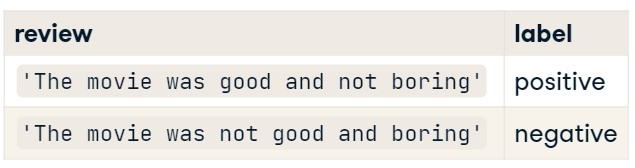

In [25]:
## Hình minh họa Image(fig1, height, width)

#### n-grams
An `n-gram` is a contiguous sequence of `n elements (or words)` in a `given document`. 

The `bag-of-words model` that we've explored so far is nothing but an `n-gram model` where `n` is equal to `one`. 

Let's now explore `n-grams` when `n` is greater than one. Consider the sentence `'for you a thousand times over'`. 

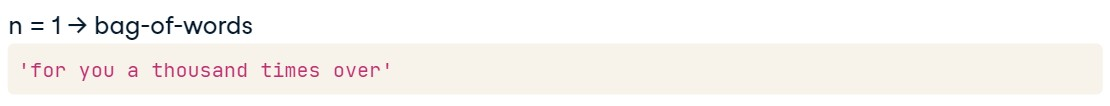

In [26]:
## Hình minh họa Image(fig1, height, width)

- If we set `n = 2`, then the `n-grams` (called `bigrams` in this case) would be `"for you"`, `"you a"`, `"a thousand"`, `"thousand times"` and `"times over"`.

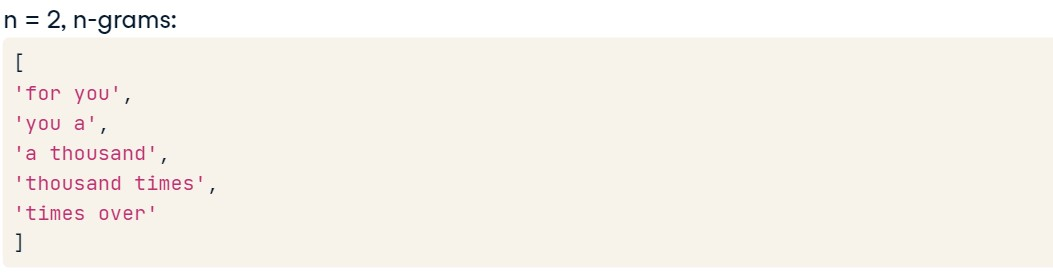

In [27]:
## Hình minh họa Image(fig1, height, width)

- Similarly, for `n = 3`, the `n-grams` (or `trigrams`) will be `"for you a"`, `"you a thousand"`, `"a thousand times"`, `"thousand times over"`.

Therefore, we can use these `n-grams` to capture more context and account for cases like `'not'`.

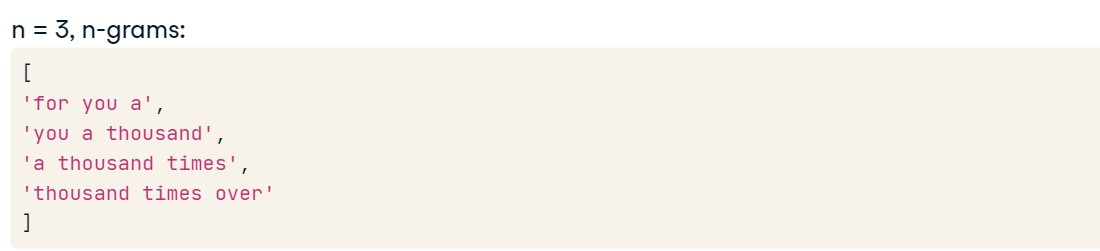

In [28]:
## Hình minh họa Image(fig1, height, width)

#### Applications
Apart from capturing more context, `n-grams` have a host of other useful applications. They are used in 
- Sentence completion, 
- Spelling correction and 
- Machine translation correction. 

In all these cases, the model computes the probability of n words occurring contiguously to perform the above processes.

#### Building n-gram models using scikit-learn
Building these `n-gram models` using `scikit-learn` is extremely simple, now that we know how to use `CountVectorizer`.

`CountVectorizer` takes in an argument `ngram range` which is a tuple containing the lower and upper bound for the range of `n-values`.
- For instance, passing `(2,2)` as the `ngram_range` will generate only `bigrams`. 

In [29]:
bigrams = CountVectorizer(ngram_range = (2, 2))

- On the other hand, passing in 1,3 will generate n-grams where n is equal to 1, 2 and 3.
#### Shortcomings
While on the surface, it may seem lucrative to generate n-grams of high orders to capture more and more context, it comes with caveats. We've already seen that the BoW vectors **run into thousands of dimensions**. 
- Adding **higher** order `n-grams` **increases the number of dimensions** even more and while performing `machine learning`, leads to a problem known as the **curse of dimensionality**. 
- Additionally, `n-grams` for *n greater than 3 become exceedingly rare to find in multiple documents*. 

So that feature becomes effectively useless. For these reasons, it is **often a good idea to restrict** yourself to `n-grams` where `n is small`.

### 3.2. PRACTICES
#### Exercise 3.2.1. n-gram models for movie tag lines
In this exercise, we have been provided with a corpus of more than 9000 movie `tag lines`.

Our job is to generate `n-gram models` up to `n = 1`, `n = 2` and `n = 3` for this data and discover the number of features for each model.

We will then compare the number of features generated for each model.
#### SOLUTION

In [30]:
# Generate n-grams upto n=1
vectorizer_ng1 = CountVectorizer(ngram_range=(1,1))
ng1 = vectorizer_ng1.fit_transform(corpus)

# Generate n-grams upto n=2
vectorizer_ng2 = CountVectorizer(ngram_range=(1,2))
ng2 = vectorizer_ng2.fit_transform(corpus)

# Generate n-grams upto n=3
vectorizer_ng3 = CountVectorizer(ngram_range=(1,3))
ng3 = vectorizer_ng3.fit_transform(corpus)

# Print the number of features for each model
print("ng1, ng2 and ng3 have %i, %i and %i features respectively" % (ng1.shape[1], ng2.shape[1], ng3.shape[1]))

ng1, ng2 and ng3 have 6614, 37100 and 76881 features respectively


#### Comments.
Notice that `ng2` has over `37,000 features` whereas `ng3` has over `76,000 features`. This is much greater than the `6,000 dimensions` obtained for `ng1`.

As the `n-gram range` increases, so does the number of features, leading to increased computational costs and a problem known as the curse of dimensionality.

#### Exercise 3.2.2. Higher order n-grams for sentiment analysis
Similar to a previous exercise, we are going to build a classifier that can detect if the review of a particular movie is positive or negative. However, this time, we will use `n-grams` up to `n=2` for the task.

In [33]:
ng_vectorizer = CountVectorizer(ngram_range=(1,2))
movie_reviews = pd.read_csv(r"../input/nlp-fe-datasets/movie_reviews_clean.csv")
X_train, X_test, y_train, y_test = train_test_split(movie_reviews['review'], 
                                                    movie_reviews['sentiment'], 
                                                    stratify = movie_reviews['sentiment'],
                                                    test_size = 0.25, random_state = 50)
X_train_ng = ng_vectorizer.fit_transform(X_train)
X_test_ng = ng_vectorizer.transform(X_test)

The `n-gram` training reviews are available as `X_train_ng`. The corresponding test reviews are available as `X_test_ng`. Finally, use `y_train` and `y_test` to access the training and test sentiment classes respectively.
#### SOLUTION.

In [35]:
# Define an instance of MultinomialNB 
clf_ng = MultinomialNB()

# Fit the classifier 
clf_ng.fit(X_train_ng, y_train)

# Measure the accuracy 
accuracy = clf_ng.score(X_test_ng, y_test)
print("The accuracy of the classifier on the test set is %.3f" % accuracy)

# Predict the sentiment of a negative review
review = "The movie was not good. The plot had several holes and the acting lacked panache."
prediction = clf_ng.predict(ng_vectorizer.transform([review]))[0]
print("The sentiment predicted by the classifier is %i" % (prediction))

The accuracy of the classifier on the test set is 0.832
The sentiment predicted by the classifier is 0


#### Comment.
Notice how this classifier performs slightly better than the BoW version. Also, it succeeds at correctly identifying the sentiment of the mini-review as negative. In the next chapter, we will learn more complex methods of vectorizing textual data.

#### Exercise 3.2.3. Comparing performance of n-gram models
You now know how to conduct sentiment analysis by converting text into various `n-gram` representations and feeding them to a classifier. In this exercise, we will conduct sentiment analysis for the same movie reviews from before using two `n-gram models`: `unigrams` and `n-grams` upto `n` equal to `3`.

We will then compare the performance using three criteria: accuracy of the model on the test set, time taken to execute the program and the number of features created when generating the `n-gram` representation.
#### SOLUTION,
#### For `unigram`

In [39]:
import time

start_time = time.time()
# Splitting the data into training and test sets
train_X, test_X, train_y, test_y = train_test_split(movie_reviews['review'],
                                                    movie_reviews['sentiment'], 
                                                    test_size=0.5, random_state=42,
                                                    stratify=movie_reviews['sentiment'])

# Generating ngrams
vectorizer = CountVectorizer()
train_X = vectorizer.fit_transform(train_X)
test_X = vectorizer.transform(test_X)

# Fit classifier
clf = MultinomialNB()
clf.fit(train_X, train_y)

# Print accuracy, time and number of dimensions
print("The program took %.3f seconds to complete. The accuracy on the test set is %.2f. The ngram representation had %i features." % (time.time() - start_time, clf.score(test_X, test_y), train_X.shape[1]))

The program took 0.298 seconds to complete. The accuracy on the test set is 0.75. The ngram representation had 12347 features.


#### For `n_grams = 3`

In [40]:
start_time = time.time()
# Splitting the data into training and test sets
train_X, test_X, train_y, test_y = train_test_split(movie_reviews['review'], movie_reviews['sentiment'], 
                                                    test_size=0.5, random_state=42, 
                                                    stratify=movie_reviews['sentiment'])

# Generating ngrams
vectorizer = CountVectorizer(ngram_range=(1,3))
train_X = vectorizer.fit_transform(train_X)
test_X = vectorizer.transform(test_X)

# Fit classifier
clf = MultinomialNB()
clf.fit(train_X, train_y)

# Print accuracy, time and number of dimensions
print("The program took %.3f seconds to complete. The accuracy on the test set is %.2f. The ngram representation had %i features." % (time.time() - start_time, clf.score(test_X, test_y), train_X.shape[1]))

The program took 1.476 seconds to complete. The accuracy on the test set is 0.77. The ngram representation had 178240 features.


#### Comments.
The program took around 1.5 seconds in the case of the unigram model and more than 10 times longer for the higher order n-gram model. The unigram model had over 12,000 features whereas the `n-gram` model for upto `n=3` had over 178,000! 

Despite taking higher computation time and generating more features, the classifier only performs marginally better in the latter case, producing an accuracy of `77%` in comparison to the `75%` for the unigram model.